<a href="https://colab.research.google.com/github/remziyeer/CLUSTERING/blob/main/Eli5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ELI5 nedir?


ELI5, tek bir birleştirilmiş API kullanarak farklı Makine Öğrenimi modellerinde hata ayıklama ve görselleştirme esnekliği sağlayan bir python kitaplığıdır. Farklı Makine Öğrenimi çerçeveleri için yerleşik destek sağlar ve kara kutu modellerini açıklamak için birleşik bir yol sunar.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# ML algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import eli5
import seaborn as sns



In [21]:
X=pd.read_csv("Iris.csv")
#Alakasız sütunları silmek
drop_features = ['Species']
X = X.drop(drop_features, axis = 1)
y= X.Id.copy() 
X = X.drop('Id', axis = 1)
# Varsa eksik değerlerin işlenmesi
X.fillna(method ='ffill', inplace = True)
X.head()
     

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Bu adımda, verileri kontrol etme, veri setini girdilere ve sonuçlara ayırma, eğitim ve test setleri ve kategorik değişkenleri etiketleme gibi bazı temel ön işleme adımlarını gerçekleştirdik.

In [22]:
X.isna().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [23]:
# Veri setini Eğitim seti ve Test seti olarak ayırma (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Verileri hazırladıktan sonra, tahminler yapmak için bir makine öğrenimi modeli eğitmeye hazırız. Bu durumda, bir karar ağacı sınıflandırıcısı kullanıyoruz.

In [32]:
# Karar Ağacı Sınıflandırıcı 
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Modeli eğittikten sonra, test için ayırdığımız veri setinin %25'lik bölümünde test ettik.



In [25]:
# Test seti sonuçlarını tahmin etme 
y_pred = classifier_dtc.predict(X_test)

Tahminler yapıldı, sıra model değerlendirmeye geldi. Burada bir karışıklık matrisi kullanıyoruz. Bir karışıklık matrisindeki her satır, gerçek sınıfa karşılık gelirken, her sütun tahmin edilen bir sınıfa karşılık gelir.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

sınıflandırma raporu  :               precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       0.0
          34       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
   

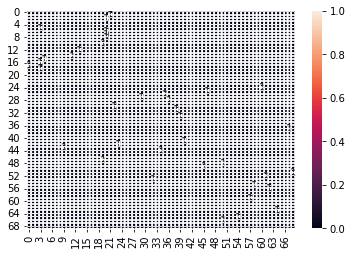

In [33]:
# Karışıklık Matrisini 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(y_test,y_pred)
print("sınıflandırma raporu  :", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

Başlangıç ​​olarak, tahminde her bir özelliğe verilen ağırlığı bulmak için allow_weights() işlevini kullanabiliriz. Ağaç tabanlı modeller için ELI5, özellik ağırlıklarını hesaplamak için yeni bir şey yapmaz. Karar ağaçlarını ağırlık olarak hazırlamak için kullanılan GINI indeksini kullanır

In [28]:
eli5.explain_weights(classifier_dtc)


Weight,Feature
0.3028,x0
0.2752,x1
0.2202,x3
0.2018,x2


İşte özellik ağırlıkları ile karar ağacının bir kısmı.



Belirli bir satır için sonucun nasıl tahmin edildiğini hata ayıklamak ve kontrol etmek isteyip istemediğimizi varsayalım. accept_prediction()'ı kullanabiliriz.



In [29]:
eli5.explain_prediction(classifier_dtc , np.array(X_test)[1])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients per class.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0), FeatureWeight(feature='x0', weight=0.0009994619818245749, std=None, value=6.8), FeatureWeight(feature='x1', weight=0.0007889423922591149, std=None, value=3.2), FeatureWeight(feature='x2', weight=0.0005263157894736838, std=None, value=5.9)], neg=[FeatureWeight(feature='x3', weight=-0.011243291592128802, std=None, value=2.3)], pos_remaining=0, neg_remaining=0), proba=0.0, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0), FeatureWeight(feature='x0', weight=0.0009994619818245749, std=None, value=6.8), FeatureWeight(feature='x1', weight=0.0007889423922591149, std=None, value=3.2), FeatureWeight(feature='x2', weight=0.0005263157894736838, std=None, value=5.9)], neg=[FeatureWeight(feature='x3', weight=-0.011243291592128802, std=None, value=2.3)], pos_remaining=0, neg_remaining=0), proba=0.0, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=3, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0), FeatureWeight(feature='x0', weight=0.000505390835579515, std=None, value=6.8), FeatureWeight(feature='x3', weight=0.0003846153846153843, std=None, value=2.3), FeatureWeight(feature='x1', weight=0.00018142235123367288, std=None, value=3.2)], neg=[FeatureWeight(feature='x2', weight=-0.01, std=None, value=5.9)], pos_remaining=0, neg_remaining=0), proba=0.0, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=4, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0)], neg=[FeatureWeight(feature='x0', weight=-0.008928571428571428, std=None, value=6.8)], pos_remaining=0, neg_remaining=0), proba=0.0, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=7, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0)], neg=[FeatureWeight(feature='x0', weight=-0.008928571428571428, std=None, value=6.8)], pos_remaining=0, neg_remaining=0), proba=0.0, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=8, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.008928571428571428, std=None, value=1.0), FeatureWeight(feature='x0', weight=0.0009994619818245749, std=None, value=6.8), FeatureWeight(feature='x1', weight=0.0007889423922591149, std=None, value=3.2), FeatureWeight(feature='x2', weight=0.0005263157894736838, std=None, value=5.9)], neg=[FeatureWeight(feat

Yukarıdaki çıktıdan da görülebileceği gibi, eli5 her bir özelliğin çıktıyı tahmin etmedeki katkısını bize göstermektedir. Hangi özellik ve değer kombinasyonunun belirli bir tahmine yol açtığını görmek ve karşılaştırmak isterseniz, show_prediction()'ı kullanabiliriz.

In [30]:
eli5.show_prediction(classifier_dtc, X_test.iloc[1],
                    feature_names=list(X.columns),
                    show_feature_values=True)

In [31]:
eli5.show_prediction(classifier_dtc, X_test.iloc[20],
                    feature_names=list(X.columns),
                    show_feature_values=True)